In [4]:
import helpFunctions as hf 
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import math
import sympy 
from sympy.solvers import solve
from sympy import Symbol
from scipy.optimize import fsolve
import scipy
# import pylaimport math
from numpy import exp, arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show



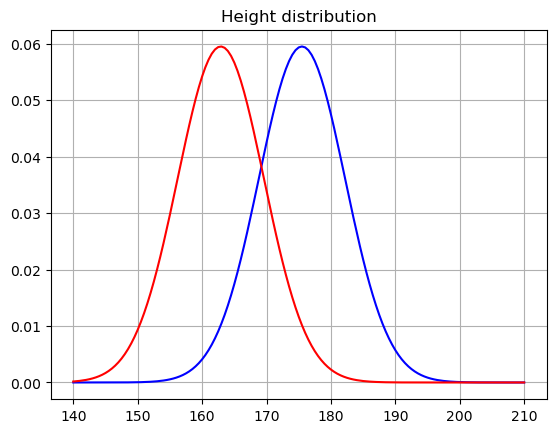

In [5]:
# Exercise 1.2
dirIn = '/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/Salami/data/'

mu_men = 175.5
mu_women = 162.9

def f(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*sympy.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

x = []
i = 140
while i <= 210:
    x.append(i)
    i+=0.5


heights_men = [f(i, mu_men) for i in x]
heights_women = [f(i, mu_women) for i in x]

plt.plot(x, heights_men, color="b")
plt.plot(x, heights_women, color="r")
plt.title("Height distribution")
plt.grid()
plt.show()

We are now interested in finding the value of x where:
f(x|175.5) ≥ f(x|162.9)
Find the solution graphical and by evaluation of the inequality.

In this inequality is x is the height at which it is more probable to to be male than female. Graphically, we can approximate this height to around 169 cm.

In [6]:
# Exercise 1.3
from scipy.optimize import minimize_scalar
print(f(170,mu_men)/f(170,mu_women))

# def func(x):
#     return f(x,mu_men)/f(x,mu_women) - 1

def func(x,mu):
    return (1/(6.7*math.sqrt(2*math.pi)))*np.exp(-(1/2)*(1/6.7**2)*(x-mu)**2)

# res = minimize_scalar(func)
# print(res.x)
# print(res.fun)

# x = Symbol('x')
# print(sympy.nonlinsolve([f(x,mu_men)-f(x,mu_women)], [x]))



1.25175791743968


In [7]:
def approx_intersect(min_initial, max_initial, num_vals, interval):
    x_vals = np.linspace(min_initial, max_initial, num_vals)
    for i in x_vals:
        if f(i, mu_men)/f(i, mu_women) <= 1+interval and  f(i, mu_men)/f(i, mu_women) >= 1-interval: return i
    return None

print(approx_intersect(168, 171, 6000, 0.0005))

169.19869978329723


In [8]:
#scipy.optimize.fsolve(lambda r: f(r,mu_men)-f(r,mu_women), 165)

def solveInter(func1,func2,incr,approx):
    i = 0
    r = True
    x = approx
    result = 0
    while r:
        set1 = func1(x)
        set2 = func2(x)
        if (set1 - set2) <= 0:
            r = True
            i += 1
        else:
            r = False
            result = x
        x += incr
    return result

def func1(x):
    return f(x,mu_men)

def func2(x):
    return f(x,mu_women)

print(solveInter(func1,func2,0.001,mu_women))


169.2000000000301


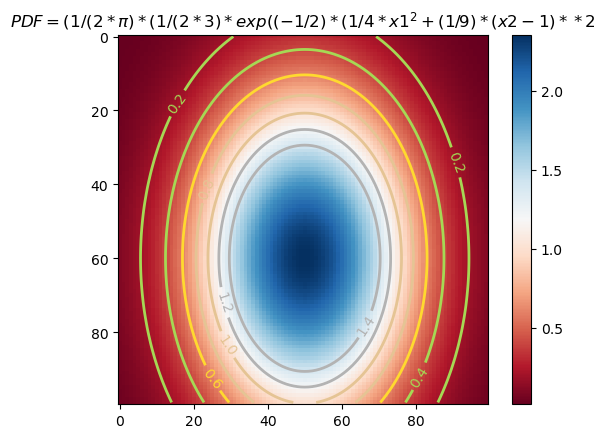

In [9]:
# Exercise 1.5

def z_func(x1, x2):
    return (1 / 2 * math.pi) * (1 / 2 * 3) * exp((-1 / 2) * (1 / 4 * x1 ** 2 + (1 / 9) * (x2 - 1) ** 2))


# def z_func(x,y):
# return (1-(x*2+y3))*exp(-(x2+y*2)/2)

x = arange(-5.0, 5.0, 0.1)
y = arange(-5.0, 5.0, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = z_func(X, Y)  # evaluation of the function on the grid

im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(-1, 1.5, 0.2), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$PDF=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
show()

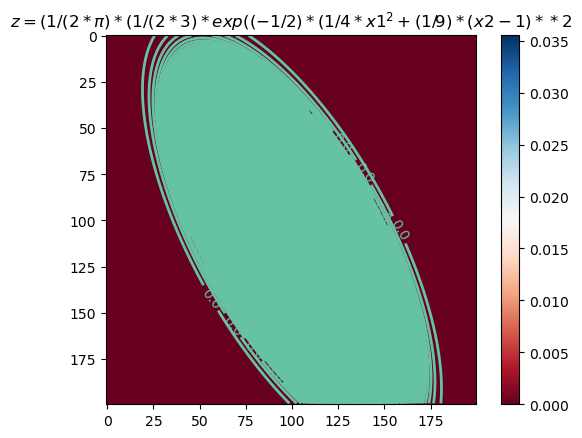

In [10]:
# Exercise 1.6
# plot joint pdf according to correlation coefficient
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show



def correlation(x1,x2,rho):
    poly = 1/4 * x1**2 - 2/6*rho*x1*(x2-1) + 1/9 * (x2 - 1)**2
    return 1/(2*math.pi) * 1/6 * 1/(math.sqrt(1-rho**2)) * exp(-1/2 * 1/(1-rho**2) * (poly) )

x = arange(-10, 10, 0.1)
y = arange(-10, 10, 0.1)
X, Y = meshgrid(x, y)  # grid of point
Z = correlation(X, Y,2/3)  # evaluation of the function on the grid

#print(X,Y,Z)
#exit()
im = imshow(Z, cmap=cm.RdBu)  # drawing the function
# adding the Contour lines with labels
cset = contour(Z, arange(0, 1, 0.00001), linewidths=2, cmap=cm.Set2)
clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
colorbar(im)  # adding the colobar on the right
# latex fashion title
title('$z=(1/(2*\pi) * (1/(2*3) * exp((-1/2) * (1/4 * x1^2 + (1/9) * (x2 -1)**2$')
show()